Tropical climate zones
Classification after Temperature

After "Köppen-climate" Classifikation the equatorial climate or tropical climate refers to areas, where the average temperature of the coldest month is above 18 °C. These areas mainly lie between 23.25° N and 23.25° S. It should be noticed that not all areas between this latitudes fullfill the Temperature criterium for reasons like the elevation.

In [22]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import matplotlib.ticker as mticker
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

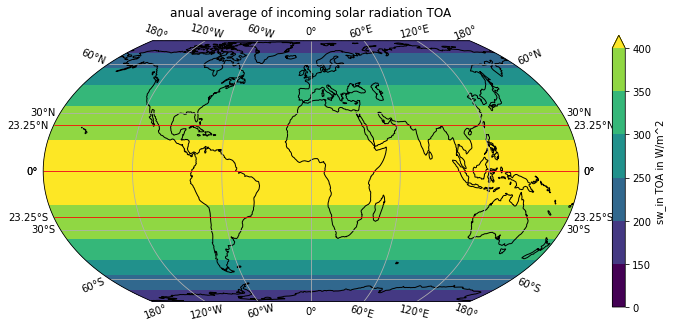

In [8]:
#classification after incoming solar radiation
ds = xr.open_dataset(r'C:\Users\leopo\Master\climate\data\CERES_EBAF-TOA_Ed4.1_Clim-2005-2015.nc')
sw_in_mean = ds.solar_clim.mean(dim = 'month')

#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
sw_in_mean.plot(ax = ax, transform = ccrs.PlateCarree(), levels = [0, 150, 200, 250, 300, 350, 400], cbar_kwargs = {'label':'sw_in TOA in W/m^2'})
plt.title('anual average of incoming solar radiation TOA')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('sw_rad.jpeg')


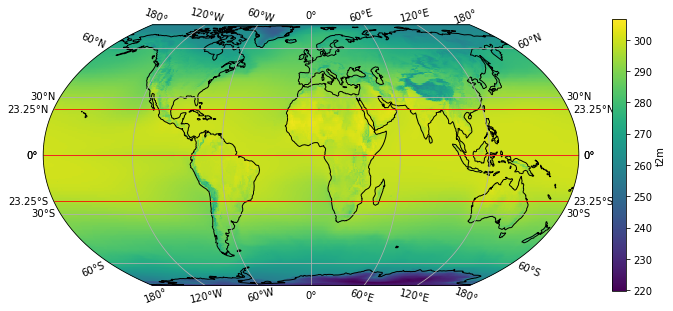

In [5]:
#classification with temperature
ds = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_t2m.nc')
#only land data
nc_inv = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Invariant.nc')

t2m = ds.t2m
t_mean = t2m.mean(dim = 'time')
#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
t_mean.plot(ax = ax, transform = ccrs.PlateCarree())
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
#grid.xlabels_top = False;
#grid.xlabels_bottom = False;
#grid.ylabels_right = False;
#grid.ylabels_left = False;
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);


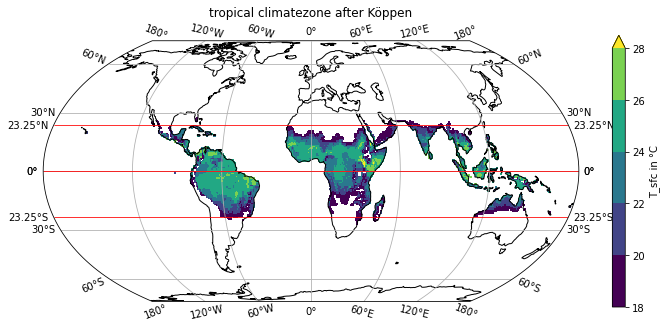

In [7]:
# monthly average temperature
t_month_avg = t2m.groupby('time.month').mean()
t_min = t_month_avg.min(dim='month') - 273.15
#t_month_avg_diff = t_month_avg.max(dim='month') - t_month_avg.min(dim='month')

#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics = t_min.where(t_min >= 18)
tropics = tropics.where(nc_inv.lsm > 0.5)

tropics_def = t2m.latitude.where(t2m.latitude == 23.25)

#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
#t_min.plot(ax = ax, transform = ccrs.PlateCarree())
tropics.plot(ax = ax, transform = ccrs.PlateCarree(), levels = [18, 20, 22, 24, 26, 28], cbar_kwargs = {'label':'T_sfc in °C'})
plt.title('tropical climatezone after Köppen')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('tropical_temperature.jpeg')

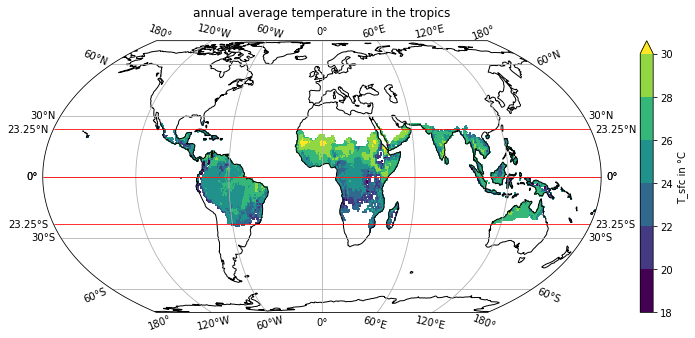

In [41]:
#compute the annual mean temperature
t_an_mean = t_month_avg.where(t_min >= 18).mean(dim = 'month') - 273.15
t_an_mean = t_an_mean.where(nc_inv.lsm > 0.5)


#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
#t_min.plot(ax = ax, transform = ccrs.PlateCarree())
t_an_mean.plot(ax = ax, transform = ccrs.PlateCarree(), levels = [18, 20, 22, 24, 26, 28, 30], cbar_kwargs = {'label':'T_sfc in °C'})
plt.title('annual average temperature in the tropics')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('anual_avg_temperature.jpeg')

In [9]:
t2m.latitude.where(t2m.latitude == 23.25)

<xarray.DataArray 'latitude' (latitude: 241)>
array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan, 23.25,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [10]:
ds = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_tp.nc')

#monthly precipitation
p_mon_avg = ds.tp.groupby('time.month').mean() * 1000 * 30
p_min = p_mon_avg.min(dim = 'month')
print(p_min.max())

<xarray.DataArray 'tp' ()>
array(1057.0435791)


In [17]:
ds.info()


xarray.Dataset {
dimensions:
	longitude = 480 ;
	latitude = 241 ;
	time = 480 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 tp(time, latitude, longitude) ;
		tp:units = m ;
		tp:long_name = Total precipitation ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2019-11-18 09:30:18 GMT by grib_to_netcdf-2.14.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -o /cache/data6/adaptor.mars.internal-1574069158.6891544-6829-11-3cc28eae-3777-426d-a5fe-bd3c8ecce585.nc /cache/tmp/3cc28eae-3777-426d-a5fe-bd3c8ecce585-adaptor.mars.internal-1574069158.6900353-6829-4-tmp.grib ;
}

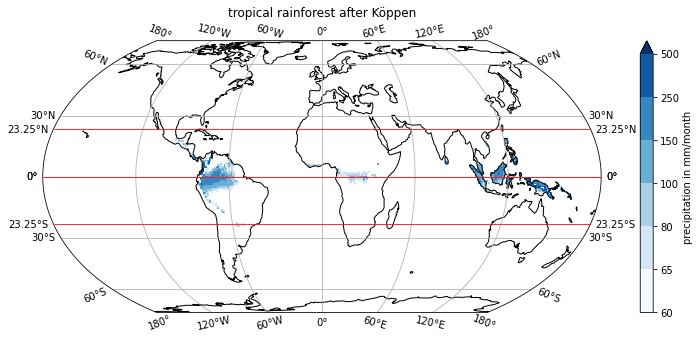

In [37]:
ds = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_tp.nc')
#only land data
nc_inv = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Invariant.nc')

#monthly precipitation
p_mon_avg = ds.tp.groupby('time.month').mean() * 1000 * 30
#p_mon_avg = p_mon_avg.mean(dim='month')
p_min = p_mon_avg.min(dim='month') 

#tropical rainforest
rainforest = p_min.where(p_min >= 60)
rainforest = rainforest.where(t_min >= 18)
rainforest = rainforest.where(nc_inv.lsm > 0.5)

#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
rainforest.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'Blues', 
                levels = [60, 65, 80, 100, 150, 250, 500], cbar_kwargs={'label':'precipitation in mm/month'})
plt.title('tropical rainforest after Köppen')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('rainforest.jpeg')
                              


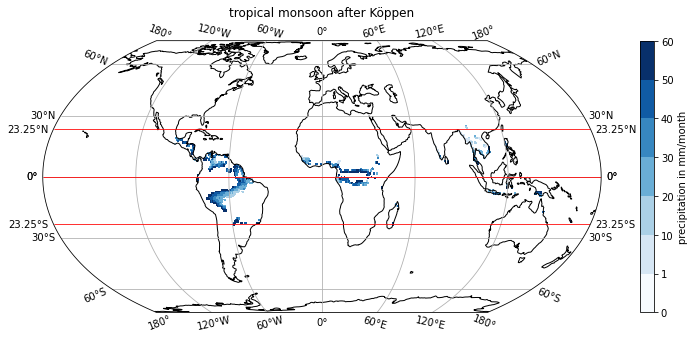

In [32]:
#tropical monsoon
p_anual_avg = ds.tp.groupby('time.year').sum() * 1000 * 30
p_anual_avg = p_anual_avg.mean(dim = 'year')
p_range = 100 - p_anual_avg/25

monsoon = p_min.where(p_min >= p_range)
monsoon = monsoon.where(monsoon < 60)
monsoon = monsoon.where(t_min >= 18)
monsoon = monsoon.where(nc_inv.lsm > 0.5)

#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
monsoon.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'Blues',
             levels = [0, 1, 10, 20, 30, 40, 50, 60], cbar_kwargs = {'label':'precipitation in mm/month'})
plt.title('tropical monsoon after Köppen')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('monsoon.jpeg')
                            

In [55]:
#why isn't india classified as monsoon climate?
monsoon.sel(latitude = slice(30,0)).sel(longitude = slice(60, 80))

<xarray.DataArray 'tp' (latitude: 41, longitude: 27)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [      nan, 56.412724, 58.120525, ...,       nan,       nan,
              nan],
       [54.63258 , 53.102474,       nan, ...,       nan,       nan,
              nan],
       [56.322273, 56.996883,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 60.38 61.12 61.88 62.62 ... 78.38 79.12 79.88
  * latitude   (latitude) float32 30.0 29.25 28.5 27.75 ... 2.25 1.5 0.75 0.0

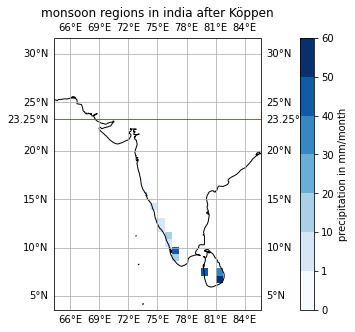

In [36]:

india = monsoon.sel(latitude = slice(30, 5)).sel(longitude = slice(65,85))
#plotting
plt.rcParams['figure.figsize'] = (14, 5)
ax = plt.axes(projection = ccrs.PlateCarree())
#p_min.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'YlGnBu', levels = [10, 20, 30, 40, 50, 60, 100, 250, 500, 1000])
india.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'Blues', 
           levels = [0, 1, 10, 20, 30, 40, 50, 60], cbar_kwargs = {'label':'precipitation in mm/month'})
plt.title('monsoon regions in india after Köppen')
#monsoon.plot.contour(ax = ax, transform = ccrs.PlateCarree(), colors = 'magenta')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('india.jpeg')


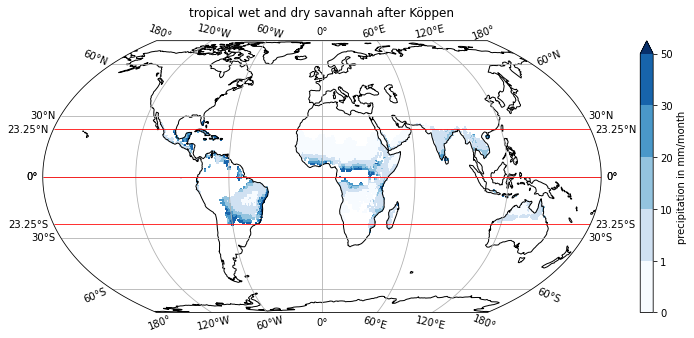

In [30]:
#savanna
p_range = 100 - p_anual_avg/25

savanna = p_min.where(p_min < p_range)
savanna = savanna.where(t_min >= 18)
savanna = savanna.where(nc_inv.lsm > 0.5)

#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
savanna.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'Blues', 
             levels = [0, 1, 10, 20, 30, 50], cbar_kwargs = {'label':'precipitation in mm/month'})
plt.title('tropical wet and dry savannah after Köppen')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('savannah.jpeg')


NameError: name 'rainforest' is not defined

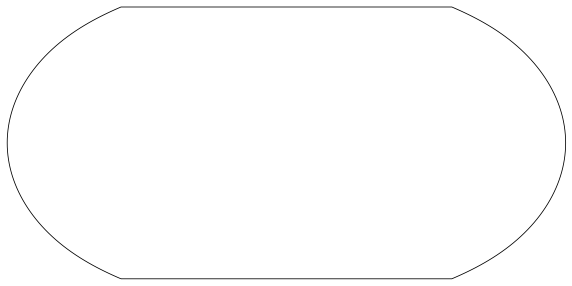

In [9]:
#plot all in one
ax = plt.axes(projection = ccrs.EqualEarth())
rainforest.plot(ax = ax, transform = ccrs.PlateCarree(), colors = 'blue', levels = [60])#, levels = [60, rainforest.max()])
monsoon.plot(ax = ax, transform = ccrs.PlateCarree(), colors = 'dodgerblue', levels = [0.7, 60])
savanna.plot(ax = ax, transform = ccrs.PlateCarree(), colors = 'lightskyblue', levels = [0, 53])
#plt.legend(loc = 'best')
plt.title('Precipitation classification of the tropics after Köppen')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.5, 0, 23.5]);
grid1.xlocator = mticker.FixedLocator([]);